Multiclass tomato disease classification

In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt

In [2]:
# declare variable size 
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS = 3

In [3]:
# import the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= (BATCH_SIZE)
)

Found 10000 files belonging to 10 classes.


In [4]:
class_name = dataset.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

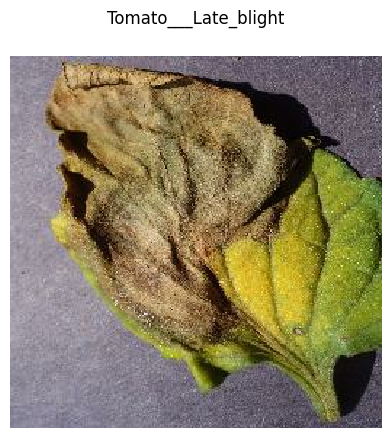

In [5]:
# visualize the image by passing 3 D array
for image_batch , label_batch in dataset.take(1):
    plt.matshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    plt.axis("off")

In [6]:
def get_partition_dataset(dataset, train_split= 0.8,val_split=0.1,test_split= 0.1,shuffle= True,shuffle_size = 10000):

    dataset_size= len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=10)

    train_size = int(train_split*dataset_size)
    val_size = int(val_split*dataset_size)
    
    train_dataset= dataset.take(train_size)
    val_dataset= dataset.skip(train_size).take(val_size)
    test_dataset= dataset.skip(train_size).skip(val_size)

    return train_dataset,val_dataset, test_dataset

In [7]:
train_dataset, val_dataset, test_dataset= get_partition_dataset(dataset)

In [8]:
# printing size of each dataset using dictionary
dict = {
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
}

for name, dataset in dict.items():
    print(f'Length of {name} dataset is {len(dataset)}')

Length of train dataset is 250
Length of validation dataset is 31
Length of test dataset is 32


In [9]:
# for faster training and better results
train_dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_dataset=val_dataset.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_dataset=test_dataset.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [10]:
# preprocessing ( scaling , resizing , and data augmentaiton )

resize_and_rescale= tf.keras.Sequential([
    # first resize 
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    # then rescaling
    layers.Rescaling(1.0/255)

])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal and vertical"),
    layers.RandomRotation(0.2),
    
])
# pass these layer while building model

In [16]:
# training model
input_shape= (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_output_layer= 10
model= models.Sequential([
    layers.InputLayer(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size =(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_output_layer,activation= 'softmax'),
    # number are based on trial and error 
])


In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,346 (1.06 MB)

 Trainable params: 278,346 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics= ['accuracy']
)

In [ ]:
history =model.fit(
    train_dataset,
    epochs= 50,
    batch_size= BATCH_SIZE,
    verbose= 1,
    validation_data=val_dataset

)

In [ ]:
scores = model.evaluate(test_dataset)

In [ ]:
# plotting the accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(50), accuracy,label='training accuracy')
plt.plot(range(50), val_accuracy,label='validation accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss,label='training loss')
plt.plot(range(50), val_loss,label='validation loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')
plt.show()

In [ ]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    plt.axis("off")

In [ ]:
import numpy as np

In [ ]:
# making predictions
for image_batch, label_batch in test_dataset.take(1):
    
    first_image= image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: " ,class_name[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

Implementation Done